In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

Loss Test Data no fine-tuning

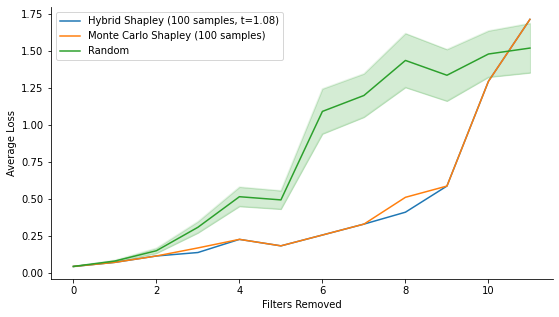

In [4]:
random_df = pd.read_csv('/data/notebook_files/lowdata_random.csv')
shapley_df = pd.read_csv('/data/notebook_files/prunedShapley.csv')
monte_df = pd.read_csv('/data/notebook_files/MonteprunedShapley.csv')
data_df = pd.DataFrame()
data_df['Hybrid Shapley (100 samples, t=1.08)'] = shapley_df['Loss']
data_df['Random'] = random_df['Loss']
data_df['Monte Shapley (100 samples)'] = monte_df['Loss']
data_df['Layers Pruned'] = random_df['Layers Pruned']

std2_df = pd.read_csv('lowdata_random2.csv')
std3_df = pd.read_csv('lowdata_random3.csv')
std_arr = random_df[["Loss"]].to_numpy()
std_arr = np.append(std_arr, std2_df['Loss'].to_numpy())
std_arr = np.append(std_arr, std3_df['Loss'].to_numpy())
all_arr = np.split(std_arr, 3)
std_arr = np.split(std_arr, 3)
std_arr = np.std(std_arr, axis=0)
std_arr[0] = 0
error = std_arr
lower =  np.mean(all_arr, axis=0) - error
upper = np.mean(all_arr, axis=0) + error

data_df = data_df.dropna()
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(data_df['Layers Pruned'], data_df['Hybrid Shapley (100 samples, t=1.08)'], label='Hybrid Shapley (100 samples, t=1.08)')
ax.plot(data_df['Layers Pruned'], data_df['Monte Shapley (100 samples)'], label='Monte Carlo Shapley (100 samples)')
ax.plot(data_df['Layers Pruned'], np.mean(all_arr, axis=0), label='Random')
ax.plot(data_df['Layers Pruned'], lower, color='tab:green', alpha=0.1)
ax.plot(data_df['Layers Pruned'], upper, color='tab:green', alpha=0.1)
ax.fill_between(data_df['Layers Pruned'], lower, upper, alpha=0.2, color='tab:green')
ax.set_xlabel('Filters Removed')
ax.set_ylabel('Average Loss')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

AOC Shapley Low-data

In [3]:
aoc_df = pd.DataFrame()
aoc_df['AOC Shapley'] = shapley_df['Accuracy']
arr_aoc = aoc_df['AOC Shapley'].to_numpy()
arr_aoc = arr_aoc[~np.isnan(arr_aoc)]
area = np.trapz(arr_aoc, dx=1)
print("area =", area/len(arr_aoc))

area = 0.7877708333333334


AOC Random Low-data

In [5]:
aoc_df = pd.DataFrame()
aoc_df['AOC Random'] = random_df['Accuracy']
arr_aoc = aoc_df['AOC Random'].to_numpy()
arr_aoc = arr_aoc[~np.isnan(arr_aoc)]
area = np.trapz(arr_aoc, dx=1)
print("area =", area/len(arr_aoc))

area = 0.6537083333333333


In [6]:
aoc_df = pd.DataFrame()
aoc_df['AOC Random'] = monte_df['Accuracy']
arr_aoc = aoc_df['AOC Random'].to_numpy()
arr_aoc = arr_aoc[~np.isnan(arr_aoc)]
area = np.trapz(arr_aoc, dx=1)
print("area =", area/len(arr_aoc))

area = 0.78359375


Accuracy Test Data No Fine-Tuning

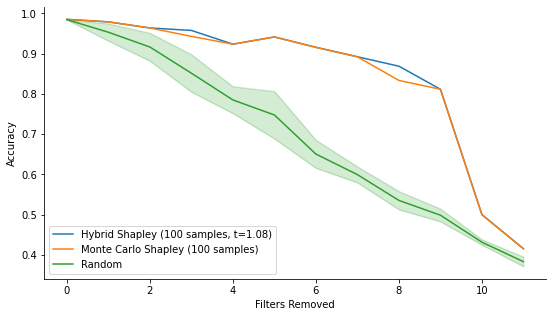

In [12]:

random_df = pd.read_csv('/data/notebook_files/lowdata_random_accuracy.csv')
shapley_df = pd.read_csv('/data/notebook_files/prunedShapley.csv')
monte_df = pd.read_csv('/data/notebook_files/MonteprunedShapley.csv')

data_df = pd.DataFrame()
data_df['Hybrid Shapley (100 samples, t=1.08)'] = shapley_df['Accuracy']
data_df['Shapley (Full / 50 Samples)'] = shapley_df['Accuracy']
data_df['Random'] = random_df['Accuracy']
data_df['Layers Pruned'] = monte_df['Pruned Layers']
data_df['Monte Shapley (100 samples)'] = monte_df['Accuracy']

std2_df = pd.read_csv('lowdata_random2.csv')
std3_df = pd.read_csv('lowdata_random3.csv')
std_arr = random_df[["Accuracy"]].to_numpy()
std_arr = np.squeeze(std_arr)
std_arr = std_arr[~np.isnan(std_arr)]
all_arr = np.split(std_arr, 3)
std_arr = np.split(std_arr, 3)
std_arr = np.std(std_arr, axis=0)
std_arr[0] = 0
error = std_arr
lower =  np.mean(all_arr, axis=0) - error
upper = np.mean(all_arr, axis=0) + error

data_df = data_df.dropna()
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(data_df['Layers Pruned'], data_df['Hybrid Shapley (100 samples, t=1.08)'], label='Hybrid Shapley (100 samples, t=1.08)')
ax.plot(data_df['Layers Pruned'], data_df['Monte Shapley (100 samples)'], label='Monte Carlo Shapley (100 samples)')
ax.plot(data_df['Layers Pruned'], np.mean(all_arr, axis=0), label='Random')
ax.plot(data_df['Layers Pruned'], lower, color='tab:green', alpha=0.1)
ax.plot(data_df['Layers Pruned'], upper, color='tab:green', alpha=0.1)
ax.fill_between(data_df['Layers Pruned'], lower, upper, alpha=0.2, color='tab:green')
ax.set_xlabel('Filters Removed')
ax.set_ylabel('Accuracy')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()